In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 가설 설정
- 생활인구와 인구분포가 상권발달에 영향을 줄 것이다.

## 2. 가설 설정 배경
- 아래의 분석 1 항목을 보면 알겠지만, 자치구별로 노인인구 비율이 다르다.
    - 노인 유동인구가 많다면 그들은 어느 시간대에 많이 관측될까?
        - 노인의 생활패턴 고려하면 시간대 1이 예상된다.
- 또한 노인인구는 활동반경이 젊은이에 비해 넓지 않을 것으로 예상된다.

## 3. 데이터 준비 1 - 자치구별 노인인구 비율
- 우선은 각 자치구의 노인인구 비율부터 확인한다.

In [2]:
# 구별 노인인구 비율 데이터
old_data = pd.read_csv(r"old.csv")
old_data.head(10)

,동별(1),동별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,동별(1),동별(2),전체인구,전체인구,전체인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
1,동별(1),동별(2),소계,남자,여자,소계,남자,여자,내국인,내국인,내국인,외국인,외국인,외국인
2,동별(1),동별(2),소계,소계,소계,소계,소계,소계,소계,남자,여자,소계,남자,여자
3,합계,소계,9667669,4675560,4992109,1667411,739300,928111,1658207,734417,923790,9204,4883,4321
4,합계,종로구,152211,72980,79231,27958,12592,15366,27704,12448,15256,254,144,110
5,합계,중구,130785,63377,67408,25055,11150,13905,24660,10946,13714,395,204,191
6,합계,용산구,233284,113012,120272,39037,17035,22002,38478,16710,21768,559,325,234
7,합계,성동구,288234,139691,148543,47720,21008,26712,47530,20902,26628,190,106,84
8,합계,광진구,351252,168197,183055,54071,24245,29826,53737,24075,29662,334,170,164
9,합계,동대문구,353601,171903,181698,64468,28702,35766,64255,28610,35645,213,92,121


In [3]:
old_data_f = old_data.iloc[4:, :] # 인덱스 넘버 0~3은 배제
old_data_f.drop(columns=['동별(1)'], inplace=True) # 불필요한 컬럼 제거
old_data_f = old_data_f.reset_index(drop=True) # 인덱스 초기화
old_data_f.rename(columns={'동별(2)':'자치구','2022': 'total', '2022.1':'total_m', '2022.2':'total_w', '2022.3':'total_old', 
                           '2022.4':'total_old_m', '2022.5':'total_old_w'}, inplace=True) # 컬럼명 변경
old_data_f

C:\Users\defy2\AppData\Local\Temp\ipykernel_1576\749557499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_data_f.drop(columns=['동별(1)'], inplace=True) # 불필요한 컬럼 제거


,자치구,total,total_m,total_w,total_old,total_old_m,total_old_w,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,종로구,152211,72980,79231,27958,12592,15366,27704,12448,15256,254,144,110
1,중구,130785,63377,67408,25055,11150,13905,24660,10946,13714,395,204,191
2,용산구,233284,113012,120272,39037,17035,22002,38478,16710,21768,559,325,234
3,성동구,288234,139691,148543,47720,21008,26712,47530,20902,26628,190,106,84
4,광진구,351252,168197,183055,54071,24245,29826,53737,24075,29662,334,170,164
5,동대문구,353601,171903,181698,64468,28702,35766,64255,28610,35645,213,92,121
6,중랑구,390140,191422,198718,74920,33609,41311,74790,33552,41238,130,57,73
7,성북구,441984,211246,230738,77475,33409,44066,77293,33318,43975,182,91,91
8,강북구,297702,144037,153665,66307,28618,37689,66170,28550,37620,137,68,69
9,도봉구,313989,152175,161814,66998,29963,37035,66942,29942,37000,56,21,35


In [4]:
old = old_data_f[['자치구','total', 'total_m', 'total_w', 
                  'total_old', 'total_old_m', 'total_old_w']] # 일부 컬럼들만 추출하여 변수화
old = old.astype({'total':int, 'total_old':int}) # dtype 조정

In [5]:
old['ratio'] = 0 # 초기값

# 65세 이상 비중 = 65세 이상 인구 / 전체 연령대 인구
for i in range(len(old)):
    old['ratio'].iloc[i] = old['total_old'].iloc[i] / old['total'].iloc[i]

old = old.sort_values('ratio', ascending=False)
old = old.reset_index(drop=True)

old_result = old[['자치구', 'ratio']]
old_result

C:\Users\defy2\AppData\Local\Temp\ipykernel_1576\1362177424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old['ratio'].iloc[i] = old['total_old'].iloc[i] / old['total'].iloc[i]


,자치구,ratio
0,강북구,0.222729
1,도봉구,0.213377
2,중랑구,0.192034
3,중구,0.191574
4,은평구,0.190501
5,종로구,0.183679
6,동대문구,0.182318
7,구로구,0.181374
8,노원구,0.181176
9,금천구,0.176791


<BarContainer object of 25 artists>

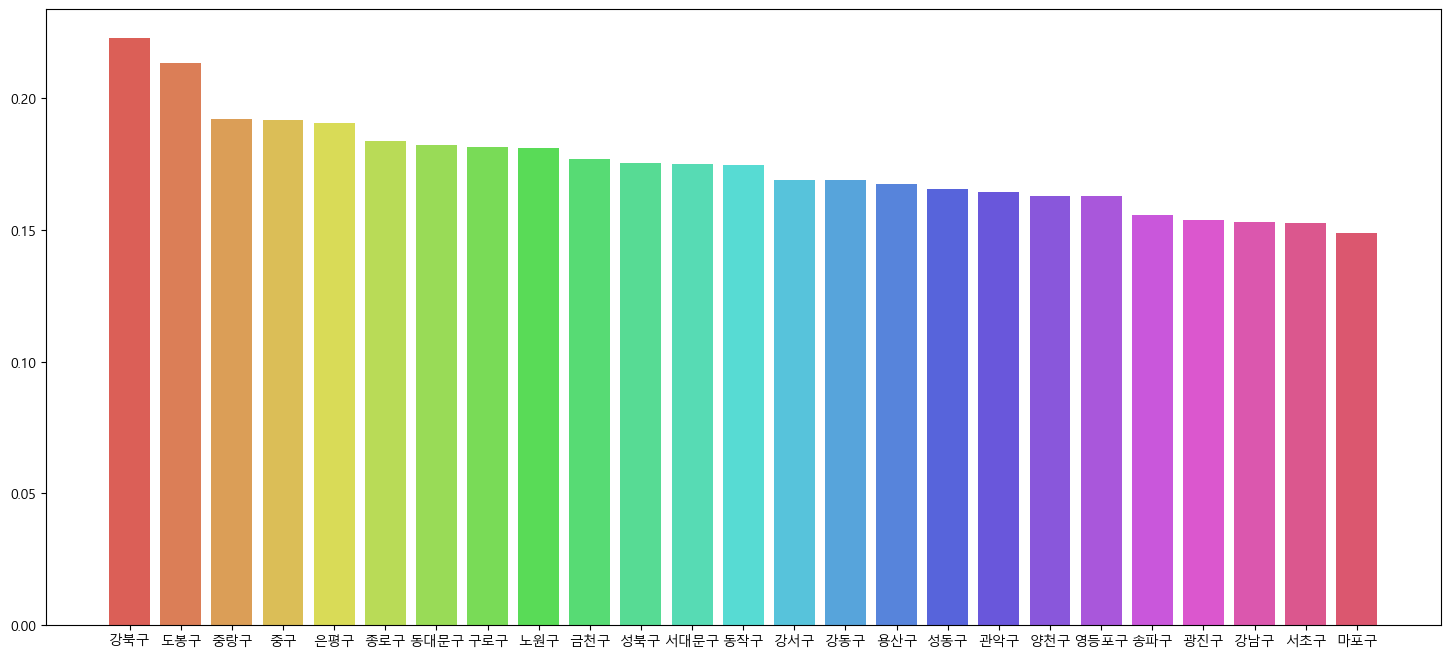

In [6]:
# 자치구별 노인인구 비율
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글인코딩
plt.figure(figsize=(18,8))
colors_1 = sns.color_palette('hls', len(old_result['자치구']))
plt.bar(old_result['자치구'], old_result['ratio'], color=colors_1)

## 데이터 준비 2
- 0~80세 대상 18시 이동유형 통계

In [7]:
# 0~80세 대상 18시 이동유형 통계
df_18 = pd.read_csv(r'p_18.csv', encoding = 'cp949')
df_18.head(3)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202309,일,18,11010,11010,F,0,EE,44,898.65
1,202309,일,18,11010,11010,F,0,EH,35,194.29
2,202309,일,18,11010,11010,F,0,EW,31,28.28


In [8]:
df_18.rename(columns={'요일':'day', '출발 시군구 코드':'depart', '도착 시군구 코드':'dest', '성별':'sex', '나이':'age', 
                      '이동유형':'kind', '이동인구(합)':'sum'}, inplace=True) # 컬럼명 영문으로 변경

# 이동유형 서울 자치구 외 지역에서 이루어진 데이터는 배제
df_18 = df_18[(df_18['depart']<20000) | (df_18['dest']<20000)] # 서울의 데이터만 추출
df_18 = df_18[['day', 'depart', 'dest', 'sex', 'age', 'kind', 'sum']] # 필요한 컬럼만 추출

# 거주지나 근무지가 아닌 곳을 이동한 경우만 추출
df_18 = df_18[df_18['kind'].str.contains('E')]
df_18 = df_18[df_18['sum']!='*'] # 'sum' 값이 '*'로 채워진 값은 제외
df_18 = df_18.astype({'sum':float}) # dtype을 연산 가능한 숫자형으로 변환
df_18 = df_18.reset_index() # 인덱스 초기화

df_18.head(3) # 전처리 결과물

,index,day,depart,dest,sex,age,kind,sum
0,0,일,11010,11010,F,0,EE,898.65
1,1,일,11010,11010,F,0,EH,194.29
2,2,일,11010,11010,F,0,EW,28.28


### 4.1. 데이터 분리
- 데이터를 평일과 주말로 분리
    - 평일을 다시 20~40대와 50대 이상 연령으로 분리

In [9]:
# 평일과 주말 데이터 분리
df_week = df_18[df_18['day'].str.contains('월|화|수|목|금')] # 평일
df_weekend = df_18[df_18['day'].str.contains('토|일')] # 주말

In [10]:
# 20~40대와 50대 이상의 연령으로 데이터 분리
df_young = df_week[(df_week['age']>=20) & (df_week['age']<50)] # 20~40대
df_old = df_week[df_week['age']>50] # 50대 이상

### 4.2. 그룹핑

In [11]:
# 20~40대 - 출발지와 도착지별로 구별 유동인구 합산
sum_y = df_young.groupby('depart')['sum'].sum().to_frame() # 20~40대 출발지 구별 유동인구
sum_y_1 = df_young.groupby('dest')['sum'].sum().to_frame() # 20~40대 도착지 구별 유동인구
sum_y.head(3)

,sum
depart,
11010,571851.57
11020,638282.86
11030,393853.97


In [12]:
# 서울 자치구가 아닌 경우 배제
sum_y = sum_y[sum_y.index < 20000] # 출발지
sum_y_1 = sum_y_1[sum_y_1.index < 20000] # 도착지

In [13]:
# 50대 이상의 연령대도 위의 방식으로 처리
sum_o = df_old.groupby('depart')['sum'].sum().to_frame() # 50대 이상 출발지 구별 유동인구
sum_o_1 = df_old.groupby('dest')['sum'].sum().to_frame() # 50대 이상 도착지 구별 유동인구

# 서울 자치구 데이터 외에는 제거
sum_o = sum_o[sum_o.index < 20000]
sum_o_1 = sum_o_1[sum_o_1.index < 20000]
sum_o_1.head(3)

,sum
dest,
11010,273444.57
11020,221533.58
11030,202869.94


### 4.3. 서울에서 자치구들이 차지하는 유동인구 비율
- 20~40대와 50대 이상으로 나눔.
- 출발지와 도착지 기준으로도 나눔.

In [14]:
# 서로 다른 연령층의 비교를 위해 비율로 다시 계산

# 20~40대 '해당 출발지 자치구 유동인구 / 서울 전체의 출발지 자치구 기준 유동인구'
s = np.sum(sum_y['sum']) # 20~40대 출발지 구들의 유동인구 전부 합산
for i in range(len(sum_y)):
    sum_y['sum'].iloc[i] = sum_y['sum'].iloc[i] / s

# 50대 이상 '해당 출발지 자치구 유동인구 / 서울 전체의 출발지 자치구 기준 유동인구'
o = np.sum(sum_o['sum']) # 50대 이상 출발지 구들의 유동인구 전부 합산
for i in range(len(sum_o)):
    sum_o['sum'].iloc[i] = sum_o['sum'].iloc[i] / o

In [15]:
# 위와 같음. 다만 이쪽은 분모가 도착지 기준

# 20~40대 '해당 도착지 자치구 유동인구 / 서울 전체의 도착지 자치구 기준 유동인구'
s_1 = np.sum(sum_y_1['sum']) # 20~40대 도착지 구들의 유동인구 전부 합산
for i in range(len(sum_y_1)):
    sum_y_1['sum'].iloc[i] = sum_y_1['sum'].iloc[i] / s_1

# 50대 이상 '해당 도착지 자치구 유동인구 / 서울 전체의 도착지 자치구 기준 유동인구'
o_1 = np.sum(sum_o_1['sum']) # 50대 이상 도착지 구들의 유동인구 전부 합산
for i in range(len(sum_o_1)):
    sum_o_1['sum'].iloc[i] = sum_o_1['sum'].iloc[i] / o_1

In [16]:
# 각 자치구가 서울에서 차지하는 유동인구 비율(출발지 기준)
sum_o_1

,sum
dest,
11010,0.036326
11020,0.029430
11030,0.026950
11040,0.029420
11050,0.035108
11060,0.033493
11070,0.036757
11080,0.036962
11090,0.030846


## 5.1.1. 평일데이터 분석 1
- 출발지 기준 각 시군구 및 연령대별 유동인구
- 평일 기준

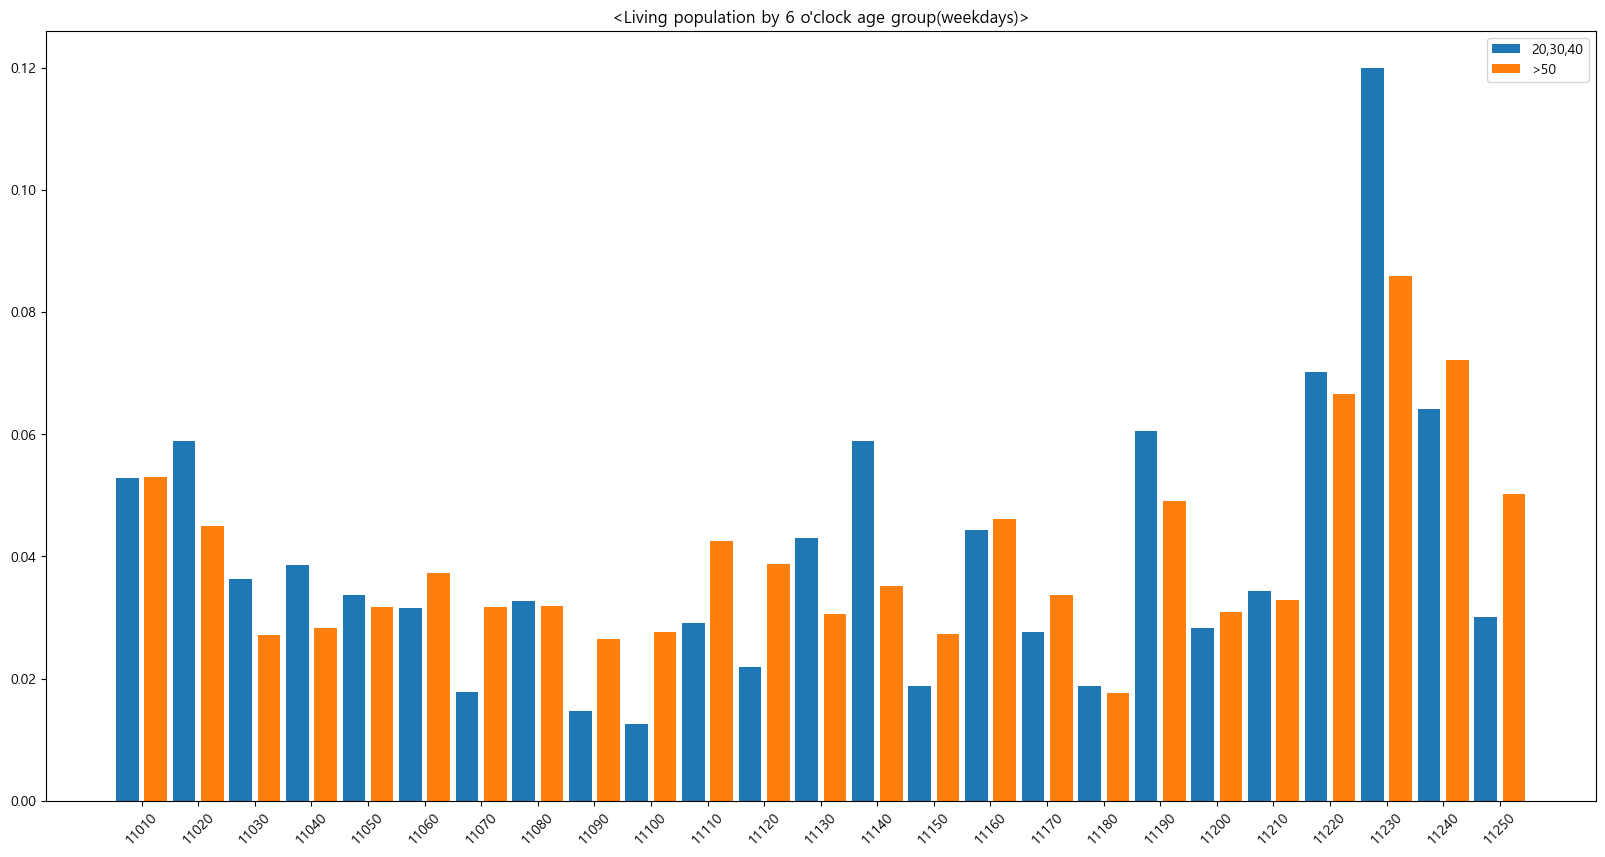

In [17]:
# 출발지 기준 각 시군구 및 연령대별 유동인구
bar_width = 2.5 # 막대 너비
plt.figure(figsize = (20,10)) # 도화지 크기

# sum_y는 출발지 자치구별 유동인구
plt.bar(sum_y.index - bar_width, height=sum_y['sum'], width = 4, label='20,30,40') # 20~40대
plt.xticks(sum_y.index, rotation = 45)
plt.bar(sum_y.index + bar_width, height=sum_o['sum'], width = 4, label='>50') # 50대 이상
plt.xticks(sum_y.index, rotation = 45)

plt.title('<Living population by 6 o\'clock age group(weekdays)>') # 차트 제목
plt.legend() # 범례

In [18]:
# 유동인구수 차이 = 20~40대 유동인구 - 50대 이상 유동인구

sum_y['difference'] = 0
for i in range(len(sum_y)):
    sum_y['difference'].iloc[i] = sum_y['sum'].iloc[i] - sum_o['sum'].iloc[i]

C:\Users\defy2\AppData\Local\Temp\ipykernel_12228\963708028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_y['difference'].iloc[i] = sum_y['sum'].iloc[i] - sum_o['sum'].iloc[i]


In [19]:
# 유동인구수 차이 변수화 후 랭킹 산정
result = sum_y['difference'].sort_values(ascending=False).to_frame()

result_1 = result.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1], :] # 상위 5개, 하위 5개
result_1

# # 20~40대의 생활인구 비율이 높은 상위 5개 자치구
## 11230: 강남구
## 11140: 마포구
## 11020: 중구
## 11130: 서대문구
## 11190: 영등포구

# 50대 이상의 생활(유동)인구 비율이 높은 상위 5개 자치구
## 11250: 강동구
## 11120: 은평구
## 11100: 도봉구
## 11070: 중랑구
## 11110: 노원구

,difference
depart,
11230,0.034030
11140,0.023669
11020,0.014031
11130,0.012527
11190,0.011402
11110,-0.013471
11070,-0.013884
11100,-0.015023
11120,-0.016886


Text(0.5, 1.0, '<Differences in the ratio of the living population in 20s, 30s, 40s and over 50s(weekday)>')

C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


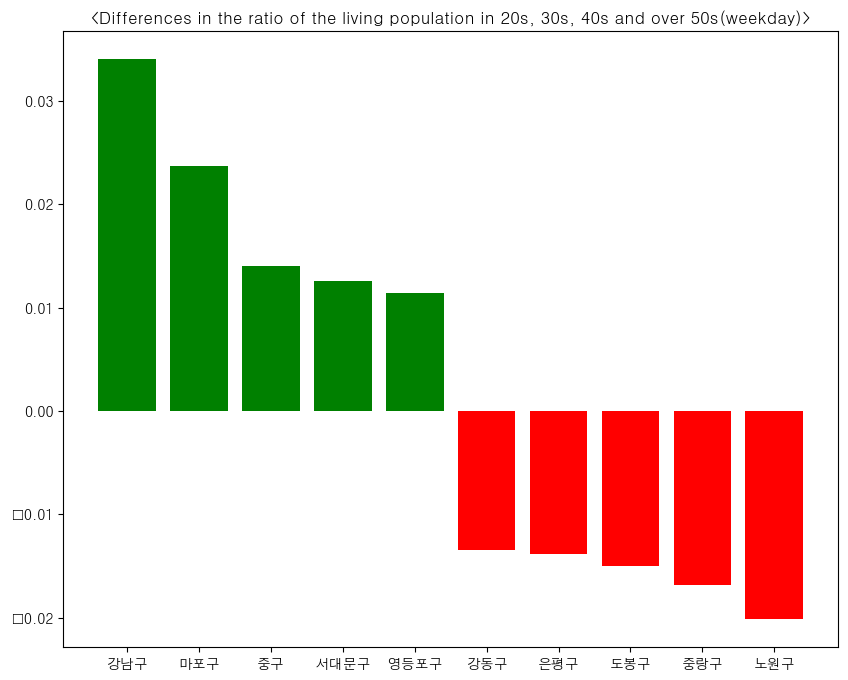

In [20]:
# 한글깨짐 현상 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/H2GTRM.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 유동인구의 20~40대 비율 - 유동인구의 50대 이상 비율
index = ['강남구', '마포구', '중구', '서대문구', '영등포구', '강동구', '은평구', '도봉구', '중랑구', '노원구']
colors = ['green', 'green', 'green','green','green','red','red','red','red','red']
plt.figure(figsize=(10,8))
plt.bar(index, result_1['difference'], color=colors)
plt.title('<Differences in the ratio of the living population in 20s, 30s, 40s and over 50s(weekday)>')

## 5.1.2 평일데이터 분석 1 결과
### 20~40대의 생활인구 비율이 높은 상위 5개 자치구
- 11230: 강남구
- 11140: 마포구
- 11020: 중구
- 11130: 서대문구
- 11190: 영등포구

### 50대 이상의 생활(유동)인구 비율이 높은 상위 5개 자치구
- 11250: 강동구
- 11120: 은평구
- 11100: 도봉구
- 11070: 중랑구
- 11110: 노원구

## 5.2.1 평일데이터 분석 2
- 도착지 기준 각 시군구 및 연령대별 유동인구
- 평일 기준

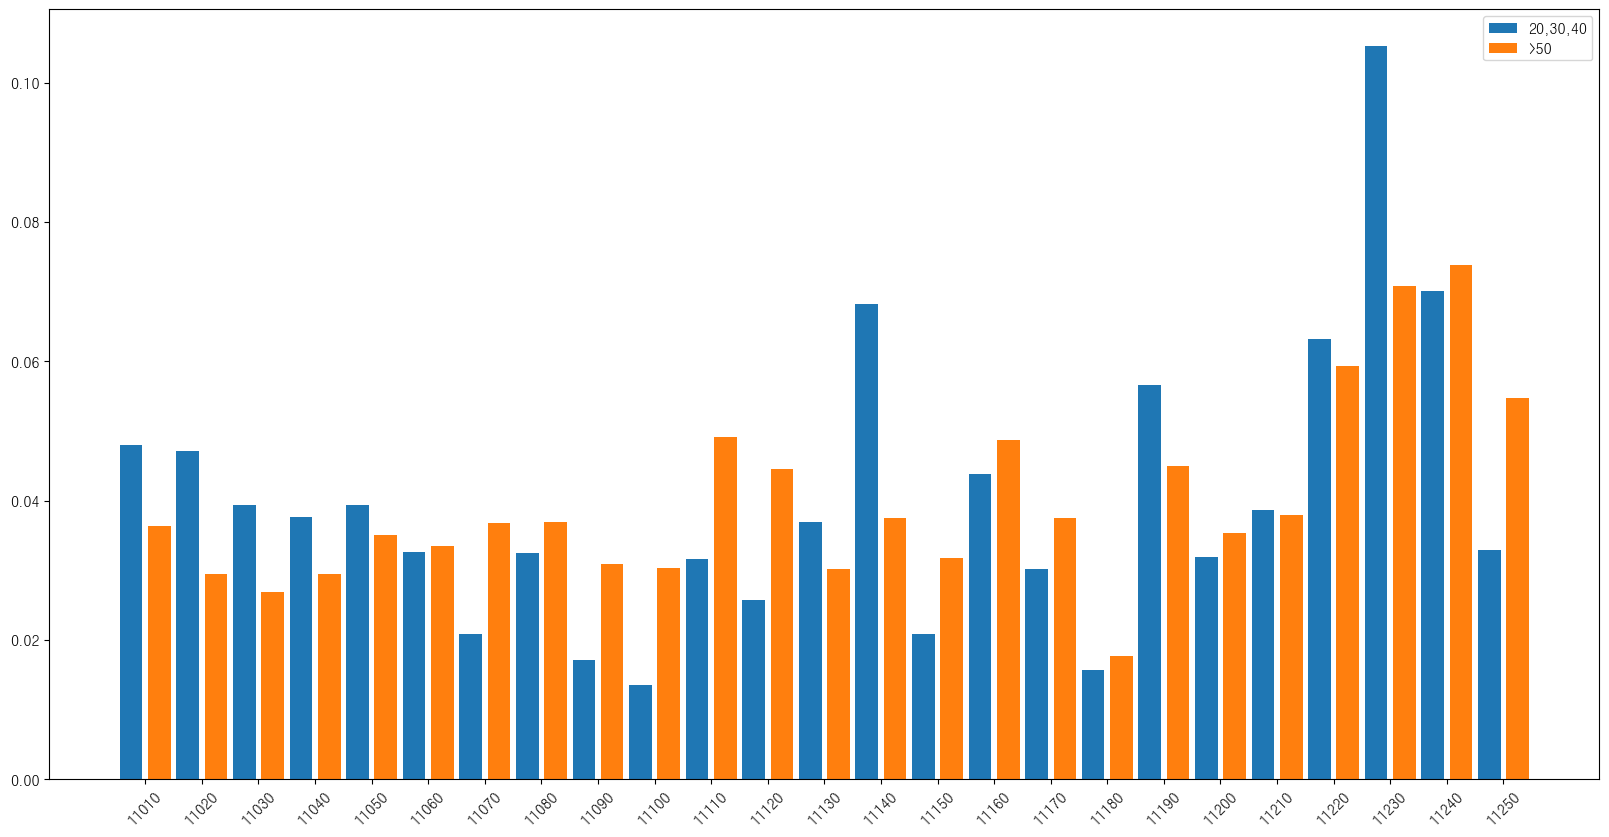

In [21]:
# 도착지 기준 각 시군구 및 연령대별 유동인구
bar_width=2.5
plt.figure(figsize = (20,10))

plt.bar(sum_y_1.index - bar_width, height=sum_y_1['sum'], width = 4, label='20,30,40')
plt.xticks(sum_y_1.index, rotation = 45)
plt.bar(sum_y_1.index + bar_width, height=sum_o_1['sum'], width = 4, label='>50')
plt.xticks(sum_o_1.index, rotation = 45)

plt.legend()

In [22]:
# 유동인구수 차이 = 20~40대 유동인구 - 50대 이상 유동인구
sum_y_1['difference'] = 0
for i in range(len(sum_y)):
    sum_y_1['difference'].iloc[i] = sum_y_1['sum'].iloc[i] - sum_o_1['sum'].iloc[i]

C:\Users\defy2\AppData\Local\Temp\ipykernel_12228\3246962943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_y_1['difference'].iloc[i] = sum_y_1['sum'].iloc[i] - sum_o_1['sum'].iloc[i]


In [23]:
sum_y_1['difference'].sort_values(ascending=False)

dest
11230    0.034433
11140    0.030682
11020    0.017669
11030    0.012411
11190    0.011656
11010    0.011652
11040    0.008290
11130    0.006650
11050    0.004320
11220    0.003821
11210    0.000690
11060   -0.000791
11180   -0.002088
11200   -0.003518
11240   -0.003685
11080   -0.004498
11160   -0.004966
11170   -0.007311
11150   -0.010917
11090   -0.013693
11070   -0.015936
11100   -0.016812
11110   -0.017441
11120   -0.018794
11250   -0.021824
Name: difference, dtype: float64

## 5.2.2. 평일데이터 분석2 결과
### 20~40대의 생활인구 비율이 높은 상위 5개 자치구
- 11230: 강남구
- 11140: 마포구
- 11020: 중구
- 11130: 서대문구
- 11190: 영등포구

### 50대 이상의 생활(유동)인구 비율이 높은 상위 5개 자치구
- 11250: 강동구
- 11120: 은평구
- 11110: 노원구
- 11100: 도봉구
- 11070: 중랑구

### 도착지 데이터는 5.1. 출발지 데이터와 크게 차이가 나지 않았다.
- 20~40대 상위 5개 자치구는 구성과 순서 모두 일치
- 50대 이상 상위 5개 자치구는 구성은 모두 일치
    - 다만 순서에 약간의 차이가 있음.

## 6.1. 주말데이터 전처리 및 데이터 분리

In [24]:
# 주말데이터도 평일데이터와 동일하게 전처리
df_young_1 = df_weekend[(df_weekend['age']>=20) & (df_weekend['age']<40)]
df_old_1 = df_weekend[df_weekend['age']>50]

# 출발지 vs 도착지 기준으로 분리 + 서울 데이터만 추출
sumy = df_young_1.groupby('depart')['sum'].sum().to_frame() # 출발지
sumy1 = df_young_1.groupby('dest')['sum'].sum().to_frame() # 도착지
sumy = sumy[sumy.index<20000]
sumy1 = sumy1[sumy1.index<20000]

# 이 위는 20~40대, 이 아래는 50대 이상
sumo = df_old_1.groupby('depart')['sum'].sum().to_frame()
sumo1 = df_old_1.groupby('dest')['sum'].sum().to_frame()
sumo = sumo[sumo.index<20000]
sumo1 = sumo1[sumo1.index<20000]

# 서울에서 각 자치구의 유동인구가 어느 정도의 비중을 가지는지?
s1 = np.sum(sumy['sum'])
for i in range(len(sumy)):
    sumy['sum'].iloc[i] = sumy['sum'].iloc[i] / s1

o1 = np.sum(sumo['sum'])
for i in range(len(sumo)):
    sumo['sum'].iloc[i] = sumo['sum'].iloc[i] / o1
    
s2 = np.sum(sumy1['sum'])
for i in range(len(sumy1)):
    sumy1['sum'].iloc[i] = sumy1['sum'].iloc[i] / s2

o2 = np.sum(sumo1['sum'])
for i in range(len(sumo1)):
    sumo1['sum'].iloc[i] = sumo1['sum'].iloc[i] / o2

## 6.1. 주말데이터 분석 1
- 출발지 기준 각 시군구 및 연령대별 유동인구
- 주말 기준

In [25]:
# 도착지 기준 '청년 비율 - 장년 비율'
sumy1['difference'] = 0
for i in range(len(sumy1)):
    sumy1['difference'].iloc[i] = sumy1['sum'].iloc[i] - sumo1['sum'].iloc[i]

C:\Users\defy2\AppData\Local\Temp\ipykernel_12228\1486076144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumy1['difference'].iloc[i] = sumy1['sum'].iloc[i] - sumo1['sum'].iloc[i]


In [26]:
sumy1['difference'].sort_values(ascending=False)
#11140: 마포구
#11030: 용산구
#11010: 종로구
#11190: 영등포구
#11020: 중구

#11070: 중랑구   
#11100: 도봉구  
#11120: 은평구   
#11110: 노원구   
#11250: 강동구 

dest
11140    0.049173
11030    0.023879
11230    0.020115
11010    0.019261
11190    0.017695
11020    0.017441
11040    0.012185
11050    0.008598
11130    0.004831
11210    0.004337
11240    0.001482
11220    0.000138
11180   -0.004344
11200   -0.004612
11160   -0.006352
11060   -0.007316
11170   -0.008493
11080   -0.009871
11150   -0.015075
11090   -0.016614
11070   -0.019392
11100   -0.019450
11120   -0.021054
11110   -0.022192
11250   -0.024370
Name: difference, dtype: float64

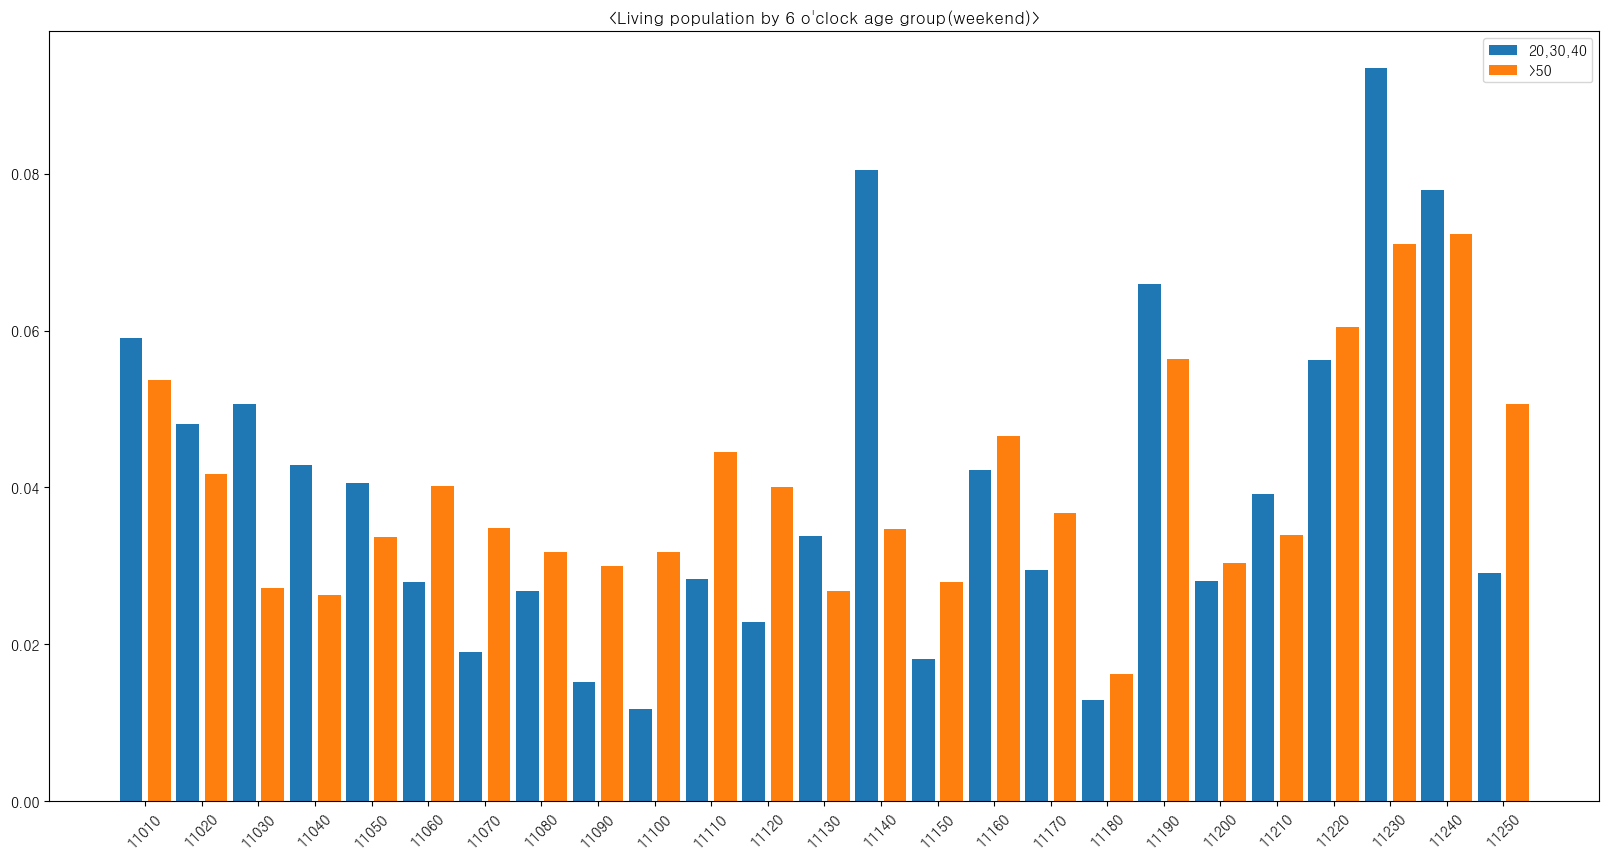

In [27]:
bar_width = 2.5
plt.figure(figsize = (20,10))
plt.bar(sumy.index - bar_width, height=sumy['sum'], width = 4, label='20,30,40')
plt.xticks(sumy.index, rotation = 45)
plt.bar(sumo.index + bar_width, height=sumo['sum'], width = 4, label='>50')
plt.xticks(sumo.index, rotation = 45)
plt.title('<Living population by 6 o\'clock age group(weekend)>')
plt.legend()

Text(0.5, 1.0, '<Differences in the ratio of the living population in 20s, 30s, 40s and over 50s(weekend)>')

C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


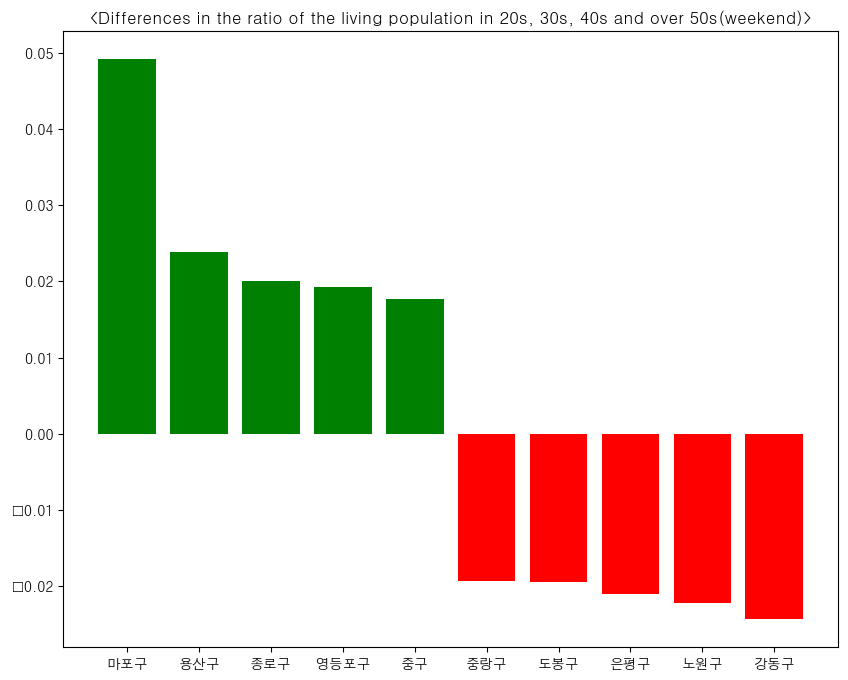

In [28]:
result2 = sumy1['difference'].sort_values(ascending=False).to_frame()
result_2 = result2.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1], :]
index = ['마포구', '용산구', '종로구', '영등포구', '중구', '중랑구', '도봉구', '은평구', '노원구', '강동구']
colors = ['green', 'green', 'green','green','green','red','red','red','red','red']
plt.figure(figsize=(10,8))
plt.bar(index, result_2['difference'], color=colors)
plt.title('<Differences in the ratio of the living population in 20s, 30s, 40s and over 50s(weekend)>')

## 6.1.2. 주말데이터 분석2 결과¶
### 20~40대의 생활인구 비율이 높은 상위 5개 자치구
- 11140 : 마포구
- 11170 : 용산구
- 11110 : 종로구
- 11190 : 영등포구
- 11020 : 중구

### 50대 이상의 생활(유동)인구 비율이 높은 상위 5개 자치구
- 11250 : 강동구
- 11110 : 노원구
- 11120 : 은평구
- 11100 : 도봉구
- 11070 : 중랑구


## 6.2.1 주말데이터 분석 2
- 도착지 기준 각 시군구 및 연령대별 유동인구
- 주말 기준

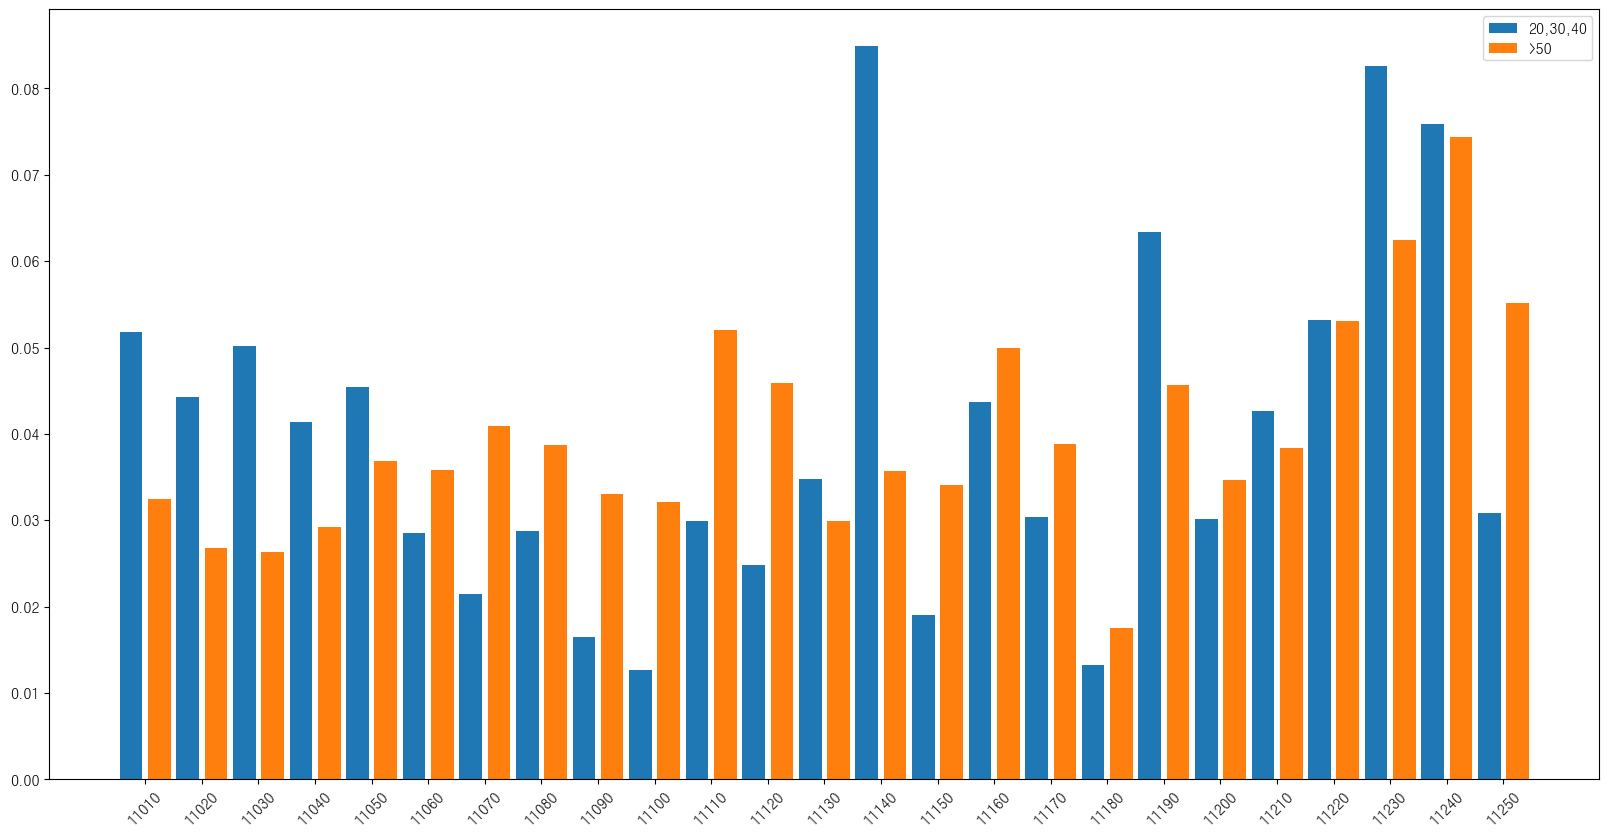

In [29]:
bar_width=2.5
plt.figure(figsize = (20,10))

plt.bar(sumy1.index - bar_width, height=sumy1['sum'], width = 4, label='20,30,40')
plt.xticks(sumy1.index, rotation = 45)
plt.bar(sumo1.index + bar_width, height=sumo1['sum'], width = 4, label='>50')
plt.xticks(sumo1.index, rotation = 45)

plt.legend()

In [30]:
# 유동인구수 차이 변수화 후 랭킹 산정
result = sumy1['difference'].sort_values(ascending=False).to_frame()

result_1 = result.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1], :] # 상위 5개, 하위 5개
result_1

,difference
dest,
11140,0.049173
11030,0.023879
11230,0.020115
11010,0.019261
11190,0.017695
11070,-0.019392
11100,-0.019450
11120,-0.021054
11110,-0.022192


## 6.2.2. 주말데이터 분석2 결과
- 도착지 기준
### 20~40대의 생활인구 비율이 높은 상위 5개 자치구
- 11140 : 마포구
- 11030 : 용산구
- 11230 : 동대문구
- 11040 : 
- 11190 : 영등포구

### 50대 이상의 생활(유동)인구 비율이 높은 상위 5개 자치구
- 11250 : 강동구
- 11110 : 노원구
- 11120 : 은평구
- 11110 : 종로구
- 11070 : 중랑구


## 7. 청년 vs 장년 분석결과 비교 (출발지 기준)

### 20~40대
- 평일 top5 : 강남구, 마포구, 중구, 서대문구, 영등포구
- 주말 top5 : 마포구, 용산구, 종로구, 영등포구, 중구
- 일치율 60%
    - 청년층은 평일과 주말이 명확히 구분됨.
        학생, 직장인이 상당수 존재하므로.

### 50대 이상
- 평일 top5 : 강동구, 은평구, 도봉구, 중랑구, 노원구
- 주말 top5 : 강동구, 노원구, 은평구, 도봉구, 중랑구
- 일치율 100%
    - 나이가 들면 평일과 주말의 경계가 희미해지는 경향이 있다.